In [1]:
### Knowledge graph
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# f = open(path, "r")
# print(f.read())
# # for x in f:
# # #   print(x.split(","))
# #     list_sent = x.split(",")

    
sent = "kaushik likes to play cricket"
sent2 = "kaushik is studying Engineering"
sent3 = "kaushik stays in House"
list_sent = ['kaushik likes to play cricket','kaushik is studying Engineering', 'kaushik stays in mangalore','cricket is the best']
triple_list = []
for i in list_sent:
    doc = nlp(i)
#     print(i)
    for token in doc:
        temp_list = []
#         print(token.text, token.dep_)

        if 'subj' in token.dep_ or 'compound' in token.dep_:
            n1 = token.text
        if 'obj' in token.dep_:
            n2 = token.text
        if 'ROOT' in token.dep_:
            e = token.text
    temp_list.append(n1)
    temp_list.append(e)
    temp_list.append(n2)
    triple_list.append(temp_list)
print(triple_list)
# [[kaushik ,is studying ,Engineering],[kaushik ,likes to play ,cricket],[kaushik ,stays in ,mangalore]]      


[['kaushik', 'likes', 'cricket'], ['kaushik', 'studying', 'Engineering'], ['kaushik', 'stays', 'mangalore'], ['cricket', 'is', 'mangalore']]


{('kaushik', 'cricket'): 'likes', ('kaushik', 'Engineering'): 'studying', ('kaushik', 'mangalore'): 'stays', ('cricket', 'mangalore'): 'is'}


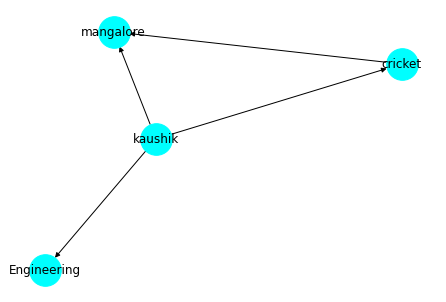

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
input_ng = triple_list
label_edge = {}
G = nx.DiGraph()
for i in input_ng:
    G.add_node(i[0])
    G.add_node(i[2])
    G.add_edge(i[0], i[2])
    label_edge[(i[0], i[2])] = i[1]
print(label_edge)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, with_labels=True, node_size=1000, node_color='cyan', node_shape='o') #with_labels to get the names
nx.draw_networkx_edge_labels(G,pos ,edge_labels = label_edge, font_color='red')
plt.show()

In [4]:
user_ip = input("give a word!\n") 

give a word!
cricket


In [5]:
def get_relationship(word, lable_edge):
    related_terms_list = []
    
    for item_tuple, relationship in lable_edge.items():
        if word in item_tuple:
            k = []
            k.extend(item_tuple)
#             k.remove(word)
            k.append(relationship)
            
            related_terms_list.append(k)
    
    return related_terms_list

ip = get_relationship(user_ip, label_edge)
print(ip)

[['kaushik', 'cricket', 'likes'], ['cricket', 'mangalore', 'is']]


[['kaushik', 'cricket', 'likes'], ['cricket', 'mangalore', 'is']]
{('kaushik', 'cricket'): 'likes', ('cricket', 'mangalore'): 'is'}


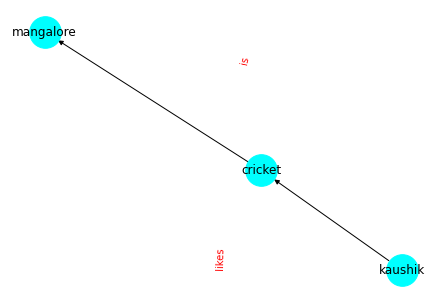

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

term = "who"
input_ng = ip
print(input_ng)
label_edge = {}
G = nx.DiGraph()
for i in input_ng:
    G.add_node(i[0])
    G.add_node(i[1])
    G.add_edge(i[0], i[1])
    label_edge[(i[0], i[1])] = i[2]

# for i in input_ng:
#     G.add_node(i[0])
#     G.add_node(i[1])
#     G.add_edge(i[0], i[1])
#     label_edge[(i[0], i[1])] = i[1]

print(label_edge)
pos = nx.spring_layout(G)
plt.figure()
nx.draw(G, with_labels=True, node_size=1000, node_color='cyan', node_shape='o') #with_labels to get the names
nx.draw_networkx_edge_labels(G,pos ,edge_labels = label_edge, font_color='red')
plt.show()